Problemimiz classification problemi 7 adet class'ımız var. Bu class'lara ait 16 adet feature mevcut

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Derin Öğrenme/data-2.xlsx') # Verimizi okuduk.
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.isnull().sum() # Boş satır yok.

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

1.  SEKER: 0

1.    BARBUNYA: 1

1.   BOMBAY: 2

1.    CALI: 3

1.    HOROZ: 4
2.    SIRA: 5 

1.   DERMASON: 6

In [4]:
for i in range(0,df['Class'].count()): # String ifadeleri sayısallaştırdık.
  if df['Class'][i] == 'SEKER':
    df['Class'] = df['Class'].replace(df['Class'][i],0)
  if df['Class'][i] == 'BARBUNYA':
    df['Class'] = df['Class'].replace(df['Class'][i],1)
  if df['Class'][i] == 'BOMBAY':
    df['Class'] = df['Class'].replace(df['Class'][i],2)
  if df['Class'][i] == 'CALI':
    df['Class'] = df['Class'].replace(df['Class'][i],3)
  if df['Class'][i] == 'HOROZ':
    df['Class'] = df['Class'].replace(df['Class'][i],4)
  if df['Class'][i] == 'SIRA':
    df['Class'] = df['Class'].replace(df['Class'][i],5)
  if df['Class'][i] == 'DERMASON':
    df['Class'] = df['Class'].replace(df['Class'][i],6)

In [5]:
print('Şeker:' + str((df['Class'] == 0).sum()) + ' Barbunya:' + str((df['Class'] == 1).sum()) + ' Bombay:' + str((df['Class'] == 2).sum())
+ ' Calı:' +str((df['Class'] == 3).sum()) + ' Horoz:' + str((df['Class'] == 4).sum()) + ' Sıra:' + str((df['Class'] ==5).sum())
+ ' Dermason:' + str((df['Class'] ==6).sum())) # Hangi classtan ne kadar veri olduğuna baktık.

Şeker:2027 Barbunya:1322 Bombay:522 Calı:1630 Horoz:1928 Sıra:2636 Dermason:3546


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X= df.drop('Class',axis=1) # Girdiler
Y= df['Class'] # Çıktılar

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=.3, random_state=58) # Train ve Test olarak verimizi ayırdık. Sivaslı olduğum için 58 yazdım. 
Ytrain = to_categorical(Ytrain, num_classes=7) # 7 adet sınıfımız olduğu için bunu kategorize ettik.
Ytest = to_categorical(Ytest, num_classes=7)

In [9]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain) # Ölçeklendirme yaptık.
Xtest = scaler.fit_transform(Xtest)

In [10]:
def modelFunc(label):
  model = Sequential(name=label)
  
  model.add(Dense(16, activation='relu', input_dim=16, kernel_regularizer='l2'))

  model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
  model.add(Dense(16, activation='relu', kernel_regularizer='l2'))

  model.add(Dense(7, activation='softmax', kernel_regularizer='l2'))

  model.compile(optimizer=label, loss='categorical_crossentropy', metrics = ['acc'])

  return model


In [11]:
def modelFit(model):
  history = model.fit(Xtrain,Ytrain,batch_size=20,epochs=10, validation_split=0.2)
  return history

In [28]:
def modelEvaluate(model):
  
  test_loss, test_acc = model.evaluate(Xtest,Ytest, batch_size=20)
  print('test acc: {0}, test_loss: {1} \n\n'.format(test_acc, test_loss))
  y_pred = model.predict(Xtest)
  from sklearn.metrics import multilabel_confusion_matrix,classification_report

  confusion = multilabel_confusion_matrix(Ytest, np.round(y_pred))
  print('Confusion Matrix: \n',confusion)
  print('\n\n')
  print(classification_report(Ytest,np.round(y_pred)))

In [21]:
def bestModel():
  adam = modelFunc('adam')

  adam.summary()

  adam_hist = modelFit(adam)

  print('Optimizer ADAM Model\n')
  modelEvaluate(adam)

  print('\nBirinci grafik accuracy değerlerini, ikinci grafik loss değerlerini gösterir.\n')
  
  ax1 = plt.subplot(1,2,1)
  ax1.plot(adam_hist.history['acc'], color='red')
  ax1.plot(adam_hist.history['val_acc'], color='blue')
  ax1.legend(['train','validation'])
  
  ax2 = plt.subplot(1,2,2)
  ax2.plot(adam_hist.history['loss'], color='red')
  ax2.plot(adam_hist.history['val_loss'], color='blue')
  ax2.legend(['train','validation'])
  
  adam.save('/content/drive/MyDrive/Derin Öğrenme/data_2_model.h5')

Model: "adam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                272       
                                                                 
 dense_25 (Dense)            (None, 64)                1088      
                                                                 
 dense_26 (Dense)            (None, 16)                1040      
                                                                 
 dense_27 (Dense)            (None, 7)                 119       
                                                                 
Total params: 2,519
Trainable params: 2,519
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
382/382 [==============================] - 2s 3ms/step - loss: 1.3135 - acc: 0.7629 - val_loss: 0.8300 - val_acc: 0.9071
Epoch 2/10
382/382 [==============================] - 1s 2ms

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


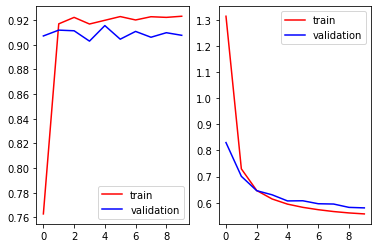

In [29]:
bestModel()

In [ ]:
# Farklı optimizasyon algoritmaları ile modelimizi oluşturduk.
adam = modelFunc('adam')
adamax = modelFunc('adamax')
rmsprop = modelFunc('rmsprop')
sgd = modelFunc('sgd')
adadelta = modelFunc('adadelta')
adagrad = modelFunc('adagrad')
ftrl = modelFunc('ftrl')
nadam = modelFunc('nadam')

 ***Aşağıda adımlarda farklı optimizasyon algoritmaları kullanarak training yaptık.***


In [ ]:
adam_hist = modelFit(adam)

Epoch 1/10
382/382 [==============================] - 1s 3ms/step - loss: 0.3154 - acc: 0.9240 - val_loss: 0.3309 - val_acc: 0.9187
Epoch 2/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3107 - acc: 0.9223 - val_loss: 0.3350 - val_acc: 0.9155
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3078 - acc: 0.9239 - val_loss: 0.3218 - val_acc: 0.9166
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3027 - acc: 0.9218 - val_loss: 0.3228 - val_acc: 0.9166
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2972 - acc: 0.9244 - val_loss: 0.3205 - val_acc: 0.9161
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2930 - acc: 0.9231 - val_loss: 0.3090 - val_acc: 0.9187
Epoch 7/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2895 - acc: 0.9206 - val_loss: 0.3077 - val_acc: 0.9166
Epoch 8/10
382/382 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
adamax_hist = modelFit(adamax)

Epoch 1/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3999 - acc: 0.9249 - val_loss: 0.4136 - val_acc: 0.9161
Epoch 2/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3888 - acc: 0.9259 - val_loss: 0.4042 - val_acc: 0.9134
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3804 - acc: 0.9242 - val_loss: 0.3956 - val_acc: 0.9197
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3733 - acc: 0.9260 - val_loss: 0.3909 - val_acc: 0.9192
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3661 - acc: 0.9243 - val_loss: 0.3908 - val_acc: 0.9066
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3611 - acc: 0.9248 - val_loss: 0.3781 - val_acc: 0.9150
Epoch 7/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3555 - acc: 0.9260 - val_loss: 0.3742 - val_acc: 0.9171
Epoch 8/10
382/382 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
rmsprop_hist = modelFit(rmsprop)

Epoch 1/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3081 - acc: 0.9223 - val_loss: 0.3365 - val_acc: 0.9087
Epoch 2/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3026 - acc: 0.9236 - val_loss: 0.3374 - val_acc: 0.9108
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2975 - acc: 0.9223 - val_loss: 0.3369 - val_acc: 0.9077
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2950 - acc: 0.9219 - val_loss: 0.3299 - val_acc: 0.9071
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2926 - acc: 0.9251 - val_loss: 0.3236 - val_acc: 0.9045
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2903 - acc: 0.9225 - val_loss: 0.3129 - val_acc: 0.9176
Epoch 7/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2872 - acc: 0.9234 - val_loss: 0.3058 - val_acc: 0.9176
Epoch 8/10
382/382 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
sgd_hist = modelFit(sgd)

Epoch 1/10
382/382 [==============================] - 1s 2ms/step - loss: 0.5496 - acc: 0.9228 - val_loss: 0.5549 - val_acc: 0.9140
Epoch 2/10
382/382 [==============================] - 1s 2ms/step - loss: 0.5249 - acc: 0.9236 - val_loss: 0.5348 - val_acc: 0.9113
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 0.5043 - acc: 0.9226 - val_loss: 0.5139 - val_acc: 0.9129
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 0.4856 - acc: 0.9219 - val_loss: 0.4972 - val_acc: 0.9150
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 0.4697 - acc: 0.9249 - val_loss: 0.4826 - val_acc: 0.9161
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 0.4559 - acc: 0.9239 - val_loss: 0.4695 - val_acc: 0.9134
Epoch 7/10
382/382 [==============================] - 1s 2ms/step - loss: 0.4437 - acc: 0.9246 - val_loss: 0.4577 - val_acc: 0.9140
Epoch 8/10
382/382 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
adadelta_hist = modelFit(adadelta)

Epoch 1/10
382/382 [==============================] - 1s 2ms/step - loss: 2.5141 - acc: 0.3601 - val_loss: 2.4920 - val_acc: 0.3730
Epoch 2/10
382/382 [==============================] - 1s 2ms/step - loss: 2.4946 - acc: 0.3658 - val_loss: 2.4725 - val_acc: 0.3799
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 2.4749 - acc: 0.3741 - val_loss: 2.4530 - val_acc: 0.3909
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 2.4553 - acc: 0.3834 - val_loss: 2.4340 - val_acc: 0.3982
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 2.4363 - acc: 0.3889 - val_loss: 2.4153 - val_acc: 0.4045
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 2.4177 - acc: 0.3975 - val_loss: 2.3972 - val_acc: 0.4155
Epoch 7/10
382/382 [==============================] - 1s 2ms/step - loss: 2.3992 - acc: 0.4077 - val_loss: 2.3787 - val_acc: 0.4260
Epoch 8/10
382/382 [==============================] - 1s 2ms/step - loss: 2.

In [ ]:
adagrad_hist = modelFit(adagrad)

Epoch 1/10
382/382 [==============================] - 1s 2ms/step - loss: 1.2130 - acc: 0.8344 - val_loss: 1.2103 - val_acc: 0.8316
Epoch 2/10
382/382 [==============================] - 1s 2ms/step - loss: 1.1801 - acc: 0.8449 - val_loss: 1.1799 - val_acc: 0.8368
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 1.1505 - acc: 0.8509 - val_loss: 1.1525 - val_acc: 0.8447
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 1.1238 - acc: 0.8583 - val_loss: 1.1275 - val_acc: 0.8526
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 1.0994 - acc: 0.8627 - val_loss: 1.1047 - val_acc: 0.8578
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 1.0772 - acc: 0.8660 - val_loss: 1.0838 - val_acc: 0.8641
Epoch 7/10
382/382 [==============================] - 1s 2ms/step - loss: 1.0567 - acc: 0.8683 - val_loss: 1.0646 - val_acc: 0.8688
Epoch 8/10
382/382 [==============================] - 1s 2ms/step - loss: 1.

In [ ]:
ftrl_hist = modelFit(ftrl)

Epoch 1/10
382/382 [==============================] - 1s 2ms/step - loss: 1.9205 - acc: 0.2573 - val_loss: 1.9171 - val_acc: 0.2702
Epoch 2/10
382/382 [==============================] - 1s 2ms/step - loss: 1.9194 - acc: 0.2573 - val_loss: 1.9159 - val_acc: 0.2702
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 1.9183 - acc: 0.2573 - val_loss: 1.9148 - val_acc: 0.2702
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 1.9173 - acc: 0.2573 - val_loss: 1.9137 - val_acc: 0.2702
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 1.9163 - acc: 0.2573 - val_loss: 1.9126 - val_acc: 0.2702
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 1.9154 - acc: 0.2573 - val_loss: 1.9116 - val_acc: 0.2702
Epoch 7/10
382/382 [==============================] - 1s 2ms/step - loss: 1.9145 - acc: 0.2573 - val_loss: 1.9106 - val_acc: 0.2702
Epoch 8/10
382/382 [==============================] - 1s 2ms/step - loss: 1.

In [ ]:
nadam_hist = modelFit(nadam)

Epoch 1/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3114 - acc: 0.9272 - val_loss: 0.3283 - val_acc: 0.9150
Epoch 2/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3067 - acc: 0.9247 - val_loss: 0.3282 - val_acc: 0.9150
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 0.3021 - acc: 0.9239 - val_loss: 0.3255 - val_acc: 0.9150
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2984 - acc: 0.9255 - val_loss: 0.3295 - val_acc: 0.9145
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2952 - acc: 0.9268 - val_loss: 0.3253 - val_acc: 0.9050
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2913 - acc: 0.9235 - val_loss: 0.3083 - val_acc: 0.9203
Epoch 7/10
382/382 [==============================] - 1s 2ms/step - loss: 0.2894 - acc: 0.9261 - val_loss: 0.3154 - val_acc: 0.9155
Epoch 8/10
382/382 [==============================] - 1s 2ms/step - loss: 0.

***Bir fonksiyon ile eğittiğimiz modelin validation accuracy ve loss değerlerinin grafiğini çizdik.***

In [ ]:
def plotAcc(adam,adamax,rmsprop,sgd,adadelta,adagrad,ftrl,nadam,adam_text,adamax_text,rmsprop_text,sgd_text,adadelta_text,adagrad_text,ftrl_text,nadam_text):
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.plot(adam.history['val_acc'], color='blue')
    plt.plot(adamax.history['val_acc'], color='orange')
    plt.plot(rmsprop.history['val_acc'], color='black')
    plt.plot(sgd.history['val_acc'], color='green')
    plt.plot(adadelta.history['val_acc'], color='red')
    plt.plot(adagrad.history['val_acc'], color='purple')
    plt.plot(adadelta.history['val_acc'], color='gray')
    plt.plot(adagrad.history['val_acc'], color='pink')
    plt.legend([adam_text,adamax_text,rmsprop_text,sgd_text,adadelta_text,adagrad_text,ftrl_text,nadam_text])
    plt.show()

In [ ]:
def plotLoss(adam,adamax,rmsprop,sgd,adadelta,adagrad,ftrl,nadam,adam_text,adamax_text,rmsprop_text,sgd_text,adadelta_text,adagrad_text,ftrl_text,nadam_text):
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.plot(adam.history['loss'], color='blue')
    plt.plot(adamax.history['loss'], color='orange')
    plt.plot(rmsprop.history['loss'], color='black')
    plt.plot(sgd.history['loss'], color='green')
    plt.plot(adadelta.history['loss'], color='red')
    plt.plot(adagrad.history['loss'], color='purple')
    plt.plot(adadelta.history['loss'], color='gray')
    plt.plot(adagrad.history['loss'], color='pink')
    plt.legend([adam_text,adamax_text,rmsprop_text,sgd_text,adadelta_text,adagrad_text,ftrl_text,nadam_text])
    plt.show()

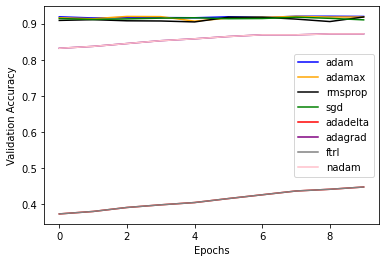

In [ ]:
plotAcc(adam_hist,adamax_hist,rmsprop_hist,sgd_hist,adadelta_hist,adagrad_hist,ftrl_hist,nadam_hist,'adam','adamax','rmsprop','sgd','adadelta','adagrad','ftrl','nadam')

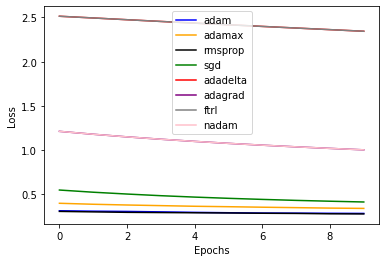

In [ ]:
plotLoss(adam_hist,adamax_hist,rmsprop_hist,sgd_hist,adadelta_hist,adagrad_hist,ftrl_hist,nadam_hist,'adam','adamax','rmsprop','sgd','adadelta','adagrad','ftrl','nadam')

In [ ]:
print('Optimizer RMSPROP Model\n')
modelEvaluate(rmsprop)

Optimizer RMSPROP Model

205/205 [==============================] - 0s 2ms/step - loss: 0.2841 - acc: 0.9263
test acc: 0.9262977242469788, test_loss: 0.2840884327888489 


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       607
           1       0.94      0.90      0.92       397
           2       1.00      0.97      0.99       158
           3       0.92      0.94      0.93       496
           4       0.98      0.93      0.95       582
           5       0.89      0.87      0.88       774
           6       0.92      0.93      0.92      1070

   micro avg       0.93      0.92      0.93      4084
   macro avg       0.95      0.93      0.94      4084
weighted avg       0.94      0.92      0.93      4084
 samples avg       0.92      0.92      0.92      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Optimizer NADAM Model\n')
modelEvaluate(nadam)

Optimizer NADAM Model

205/205 [==============================] - 0s 2ms/step - loss: 0.2875 - acc: 0.9270
test acc: 0.9270322918891907, test_loss: 0.28745153546333313 


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       607
           1       0.95      0.91      0.93       397
           2       1.00      1.00      1.00       158
           3       0.92      0.94      0.93       496
           4       0.96      0.92      0.94       582
           5       0.92      0.82      0.87       774
           6       0.91      0.95      0.93      1070

   micro avg       0.94      0.92      0.93      4084
   macro avg       0.95      0.93      0.94      4084
weighted avg       0.94      0.92      0.92      4084
 samples avg       0.92      0.92      0.92      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Optimizer ADAM Model\n')
modelEvaluate(adam)

Optimizer ADAM Model

205/205 [==============================] - 0s 1ms/step - loss: 0.2851 - acc: 0.9268
test acc: 0.9267874360084534, test_loss: 0.2851073741912842 


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       607
           1       0.94      0.91      0.92       397
           2       1.00      1.00      1.00       158
           3       0.94      0.94      0.94       496
           4       0.97      0.93      0.95       582
           5       0.90      0.86      0.88       774
           6       0.92      0.94      0.93      1070

   micro avg       0.94      0.92      0.93      4084
   macro avg       0.95      0.93      0.94      4084
weighted avg       0.94      0.92      0.93      4084
 samples avg       0.92      0.92      0.92      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Optimizer ADAMAX Model\n')
modelEvaluate(adamax)

Optimizer ADAMAX Model

205/205 [==============================] - 0s 1ms/step - loss: 0.3447 - acc: 0.9216
test acc: 0.92164546251297, test_loss: 0.344737708568573 


              precision    recall  f1-score   support

           0       0.97      0.92      0.95       607
           1       0.95      0.89      0.92       397
           2       1.00      0.99      1.00       158
           3       0.92      0.95      0.93       496
           4       0.97      0.92      0.94       582
           5       0.88      0.87      0.87       774
           6       0.93      0.92      0.92      1070

   micro avg       0.93      0.91      0.92      4084
   macro avg       0.94      0.92      0.93      4084
weighted avg       0.93      0.91      0.92      4084
 samples avg       0.91      0.91      0.91      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Optimizer SGD Model\n')
modelEvaluate(sgd)

Optimizer SGD Model

205/205 [==============================] - 0s 1ms/step - loss: 0.4202 - acc: 0.9199
test acc: 0.9199314117431641, test_loss: 0.42017868161201477 


              precision    recall  f1-score   support

           0       0.97      0.91      0.94       607
           1       0.94      0.89      0.92       397
           2       1.00      0.99      1.00       158
           3       0.94      0.93      0.93       496
           4       0.98      0.92      0.95       582
           5       0.84      0.90      0.87       774
           6       0.94      0.88      0.91      1070

   micro avg       0.93      0.90      0.92      4084
   macro avg       0.95      0.92      0.93      4084
weighted avg       0.93      0.90      0.92      4084
 samples avg       0.90      0.90      0.90      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Optimizer ADAGRAD Model\n')
modelEvaluate(adagrad)

Optimizer ADAGRAD Model

205/205 [==============================] - 0s 1ms/step - loss: 0.9990 - acc: 0.8812
test acc: 0.881243884563446, test_loss: 0.9990484714508057 


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       607
           1       0.97      0.72      0.83       397
           2       1.00      0.93      0.96       158
           3       0.94      0.79      0.86       496
           4       0.96      0.91      0.93       582
           5       0.85      0.18      0.30       774
           6       0.90      0.92      0.91      1070

   micro avg       0.93      0.74      0.83      4084
   macro avg       0.94      0.77      0.82      4084
weighted avg       0.92      0.74      0.79      4084
 samples avg       0.74      0.74      0.74      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Optimizer ADADELTA Model\n')
modelEvaluate(adadelta)

Optimizer ADADELTA Model

205/205 [==============================] - 0s 1ms/step - loss: 2.3332 - acc: 0.4454
test acc: 0.44539666175842285, test_loss: 2.3332462310791016 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       607
           1       0.00      0.00      0.00       397
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       496
           4       0.00      0.00      0.00       582
           5       0.00      0.00      0.00       774
           6       1.00      0.00      0.01      1070

   micro avg       0.60      0.00      0.00      4084
   macro avg       0.14      0.00      0.00      4084
weighted avg       0.26      0.00      0.00      4084
 samples avg       0.00      0.00      0.00      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Optimizer FTRL Model\n')
modelEvaluate(ftrl)

Optimizer FTRL Model

205/205 [==============================] - 0s 1ms/step - loss: 1.9111 - acc: 0.2620
test acc: 0.2619980275630951, test_loss: 1.9110867977142334 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       607
           1       0.00      0.00      0.00       397
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       496
           4       0.00      0.00      0.00       582
           5       0.00      0.00      0.00       774
           6       0.00      0.00      0.00      1070

   micro avg       0.00      0.00      0.00      4084
   macro avg       0.00      0.00      0.00      4084
weighted avg       0.00      0.00      0.00      4084
 samples avg       0.00      0.00      0.00      4084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
